In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing import image


In [21]:
import pathlib
import os
data_dir_train=r"E:\tree_data\train"
data_dir_train = pathlib.Path(data_dir_train)
data_dir_test=r"E:\tree_data\test"
data_dir_test = pathlib.Path(data_dir_test)
data_dir_val=r"E:\tree_data\validation"
data_dir_val = pathlib.Path(data_dir_val)
image_count_train= len(list(data_dir_train.glob('*/*')))
image_count_test= len(list(data_dir_test.glob('*/*')))
image_count_val= len(list(data_dir_val.glob('*/*')))
print("total image:",image_count_train+image_count_test+image_count_val)
print("train data 70%: ",image_count_train,"image")
print("test data 20%: ",image_count_test,"image")
print("validation data 10%: ",image_count_val,"image")


total image: 960
train data 70%:  672 image
test data 20%:  192 image
validation data 10%:  96 image


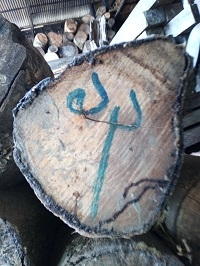

In [22]:
mango = list(data_dir_train.glob('Mango/*'))
PIL.Image.open(str(mango[0]))

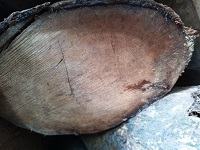

In [23]:
PIL.Image.open(str(mango[1]))

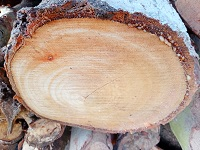

In [24]:
ashoke = list(data_dir_train.glob('Ashoke/*'))
PIL.Image.open(str(ashoke[0]))

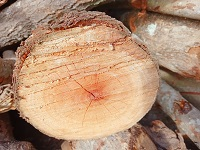

In [25]:
PIL.Image.open(str(ashoke[1]))

In [26]:
batch_size = 34
img_height = 224
img_width = 224

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 672 files belonging to 14 classes.


In [28]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 192 files belonging to 14 classes.


In [29]:
class_names = train_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


In [30]:
class_names = test_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


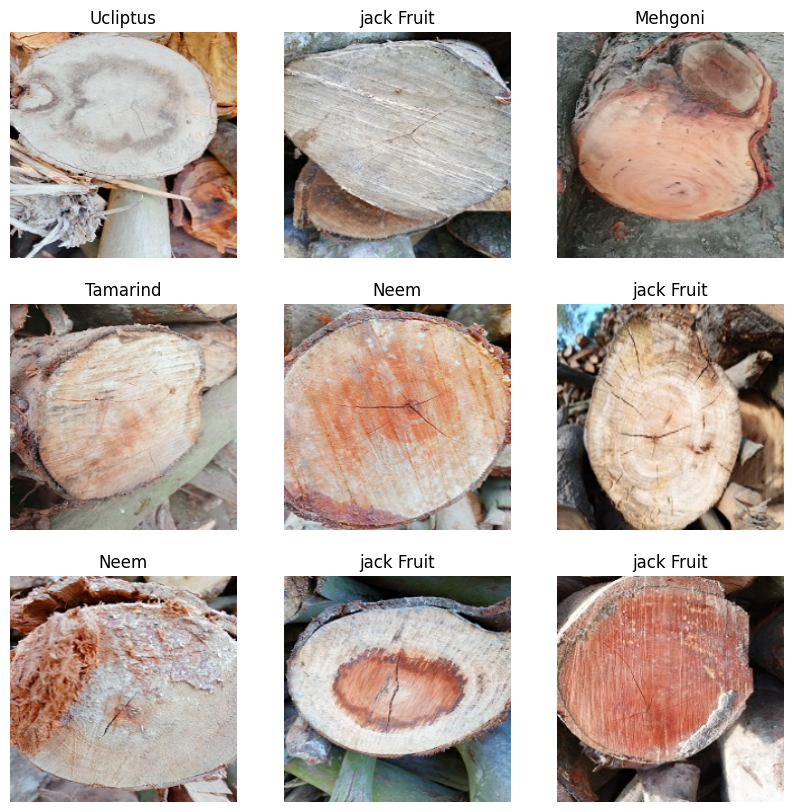

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(34, 224, 224, 3)
(34,)


In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [34]:
normalization_layer = layers.Rescaling(1./255)

In [35]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [36]:
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from glob import glob

In [37]:
num_classes = len(class_names)


In [38]:
model =VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
epochs=1
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

C:\Users\Md. Minhazul Abedin\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 451s 22s/step - loss: 69.4325 - accuracy: 0.1205 - val_loss: 3.0408 - val_accuracy: 0.0729


In [57]:
train_accuracy=history.history['accuracy']
t_accuracy=0
for x in train_accuracy:
    t_accuracy=t_accuracy+x
t_accuracy=(t_accuracy/epochs)*100

val_accuracy=history.history['val_accuracy']
v_accuracy=0
for x in val_accuracy:
    v_accuracy=v_accuracy+x
v_accuracy=(v_accuracy/epochs)*100
print("Train Accuracy : ",train_accuracy)
print("Valiation Accuracy : ",val_accuracy)
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("Train Accuracy average : ",t_accuracy,"%")
print("Valiation Accuracy average : ",v_accuracy,"%")
print("Max Accuracy: ",max(val_accuracy)*100)

Train Accuracy :  [0.269345223903656, 0.4910714328289032, 0.6860119104385376, 0.8035714030265808, 0.84375, 0.8660714030265808, 0.882440447807312, 0.8839285969734192, 0.9032738208770752, 0.9017857313156128, 0.9151785969734192, 0.9226190447807312, 0.925595223903656, 0.9345238208770752, 0.9404761791229248, 0.9360119104385376, 0.944940447807312, 0.8764880895614624, 0.7782738208770752, 0.7752976417541504]
Valiation Accuracy :  [0.0729166641831398, 0.0520833320915699, 0.0885416641831398, 0.0729166641831398, 0.2447916716337204, 0.265625, 0.2291666716337204, 0.5, 0.6510416865348816, 0.6666666865348816, 0.6197916865348816, 0.828125, 0.6458333134651184, 0.7760416865348816, 0.7239583134651184, 0.4166666567325592, 0.5625, 0.234375, 0.1197916641831398, 0.046875]
..............................................
Train Accuracy average :  82.40327373147011 %
Valiation Accuracy average :  39.08854180946946 %
Max Accuracy:  82.8125


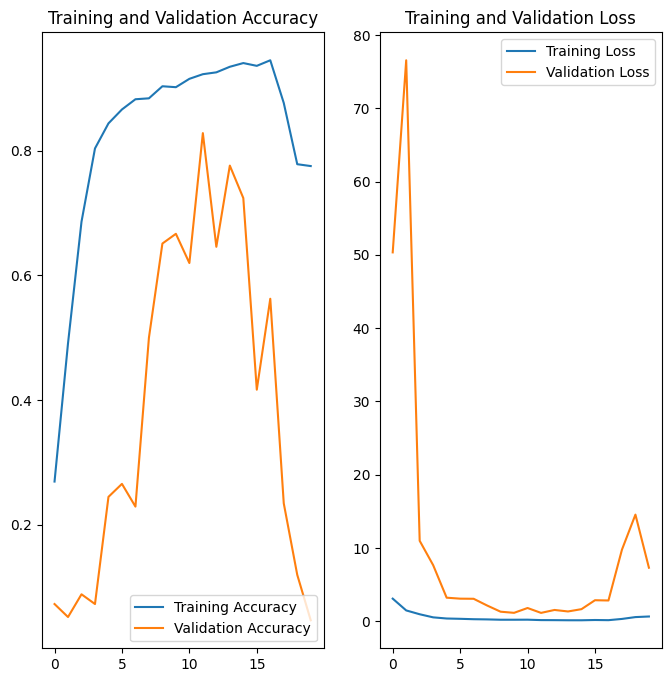

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

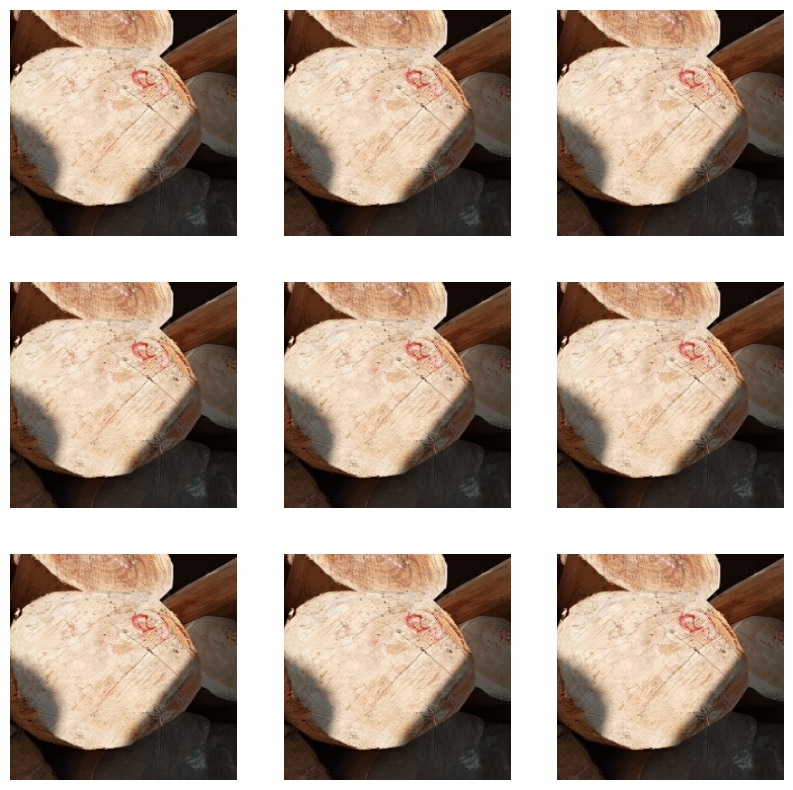

In [60]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
20/20 [==============================] - 230s 11s/step - loss: 0.7232 - accuracy: 0.7679 - val_loss: 464.9523 - val_accuracy: 0.0729
Epoch 2/20
20/20 [==============================] - 204s 10s/step - loss: 0.5855 - accuracy: 0.7917 - val_loss: 92.9932 - val_accuracy: 0.0885
Epoch 3/20
20/20 [==============================] - 199s 10s/step - loss: 0.3521 - accuracy: 0.8542 - val_loss: 30.3308 - val_accuracy: 0.1771
Epoch 4/20
20/20 [==============================] - 241s 12s/step - loss: 0.2477 - accuracy: 0.9033 - val_loss: 11.4009 - val_accuracy: 0.3177
Epoch 5/20
20/20 [==============================] - 216s 11s/step - loss: 0.2037 - accuracy: 0.8973 - val_loss: 2.0545 - val_accuracy: 0.5573
Epoch 6/20
20/20 [==============================] - 227s 11s/step - loss: 0.1782 - accuracy: 0.9167 - val_loss: 2.7877 - val_accuracy: 0.6562
Epoch 7/20
20/20 [==============================] - 205s 10s/step - loss: 0.1287 - accuracy: 0.9479 - val_loss: 1.9618 - val_accuracy: 0.7240
E

In [63]:
train_accuracy=history.history['accuracy']
t_accuracy=0
for x in train_accuracy:
    t_accuracy=t_accuracy+x
t_accuracy=(t_accuracy/epochs)*100

val_accuracy=history.history['val_accuracy']
v_accuracy=0
for x in val_accuracy:
    v_accuracy=v_accuracy+x
v_accuracy=(v_accuracy/epochs)*100
print("Train Accuracy_aug : ",train_accuracy)
print("Valiation Accuracy_aug : ",val_accuracy)
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")

print("Train Accuracy average_aug : ",t_accuracy,"%")
print("Valiation Accuracy average_aug : ",v_accuracy,"%")
print("Max Accuracy: ",max(val_accuracy)*100)

Train Accuracy_aug :  [0.7678571343421936, 0.7916666865348816, 0.8541666865348816, 0.9032738208770752, 0.8973214030265808, 0.9166666865348816, 0.9479166865348816, 0.949404776096344, 0.9389880895614624, 0.9389880895614624, 0.9598214030265808, 0.9553571343421936, 0.9389880895614624, 0.9270833134651184, 0.9017857313156128, 0.8809523582458496, 0.8779761791229248, 0.8541666865348816, 0.8883928656578064, 0.930059552192688]
Valiation Accuracy_aug :  [0.0729166641831398, 0.0885416641831398, 0.1770833283662796, 0.3177083432674408, 0.5572916865348816, 0.65625, 0.7239583134651184, 0.7395833134651184, 0.7083333134651184, 0.5208333134651184, 0.65625, 0.484375, 0.1510416716337204, 0.3020833432674408, 0.3020833432674408, 0.1666666716337204, 0.0625, 0.109375, 0.375, 0.421875]
..............................................
Train Accuracy average_aug :  90.10416686534882 %
Valiation Accuracy average_aug :  37.96874985098839 %
Max Accuracy:  73.95833134651184


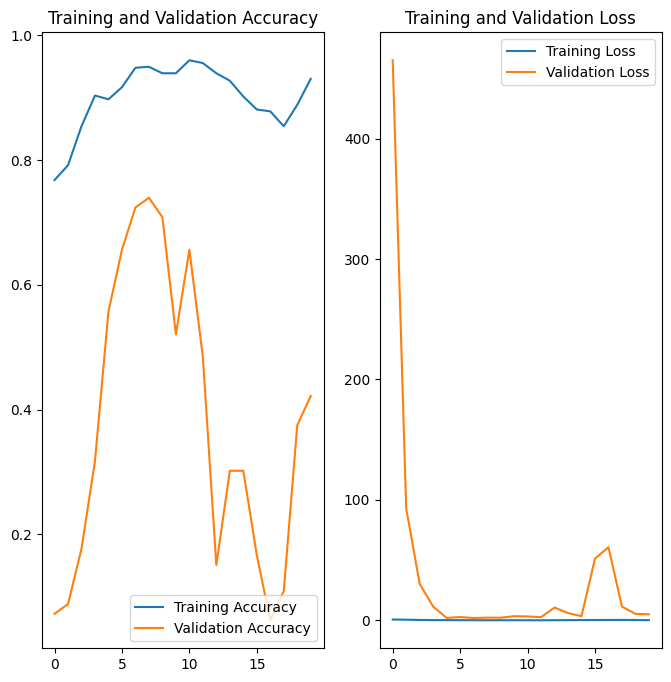

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
for y in list(data_dir_val.glob('*/*')):
    
    img = tf.keras.utils.load_img(
    y, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print (y)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
      

1/1 [==============================] - 1s 1s/step
E:\tree_data\validation\Arjun\Arjun(1).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 97ms/step
E:\tree_data\validation\Arjun\Arjun(2).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 117ms/step
E:\tree_data\validation\Arjun\Arjun(3).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 119ms/step
E:\tree_data\validation\Arjun\Arjun(4).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 108ms/step
E:\tree_data\validation\Arjun\Arjun(5).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 129ms/step
E:\tree_data\validation\Arjun\Arjun(6).jpg
This image most likely belongs to Arjun with a 0.27 percent confiden

1/1 [==============================] - 0s 116ms/step
E:\tree_data\validation\Ucliptus\Ucliptus(6).jpg
This image most likely belongs to Mehgoni with a 0.19 percent confidence.


1/1 [==============================] - 0s 122ms/step
E:\tree_data\validation\Arjun\Arjun(1).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 129ms/step
E:\tree_data\validation\Arjun\Arjun(2).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 121ms/step
E:\tree_data\validation\Arjun\Arjun(3).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 116ms/step
E:\tree_data\validation\Arjun\Arjun(4).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 125ms/step
E:\tree_data\validation\Arjun\Arjun(5).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 130ms/step
E:\tree_data\validation\Arjun\Arjun(6).jpg
This image most likely belongs to Arjun with a 0.27 percent conf

1/1 [==============================] - 0s 117ms/step
E:\tree_data\validation\Ucliptus\Ucliptus(6).jpg
This image most likely belongs to Mehgoni with a 0.19 percent confidence.
